In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%store -r m_data_prophet_no_variable_holiday
%store -r m_data_prophet_no_variable
%store -r m_data_prophet_variable_holiday
%store -r m_data_prophet_variable
%store -r date_list
%store -r update_sp500
%store -r m_data_arima_variable
%store -r m_data_arima_no_variable

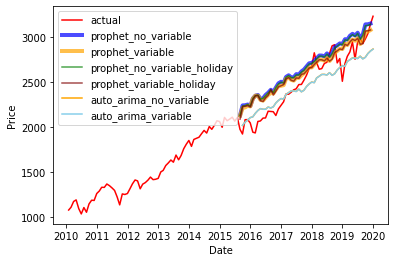

In [5]:
case_sp500 = pd.DataFrame()
case_sp500['date'] = date_list
case_sp500_update = pd.concat([case_sp500, update_sp500], axis=1).dropna()
case_sp500_update['date'] = pd.to_datetime(case_sp500_update['date'])
case_sp500_update = case_sp500_update.set_index('date')
find_sp500_case = case_sp500_update.resample('M').mean()
find_sp500_case_optimized = find_sp500_case['20100131':'20191231']
find_sp500_case_optimized = find_sp500_case_optimized.reset_index()

plt.figure()
plt.plot(find_sp500_case_optimized['date'], find_sp500_case_optimized['Price'], color='red', label='actual')
plt.plot(m_data_prophet_no_variable['ds'], m_data_prophet_no_variable['yhat'], color='blue', label='prophet_no_variable', linewidth=4, alpha = 0.7)
plt.plot(m_data_prophet_variable['ds'], m_data_prophet_variable['yhat'], color='orange', label='prophet_variable', linewidth=4, alpha = 0.7)
plt.plot(m_data_prophet_no_variable_holiday['ds'], m_data_prophet_no_variable_holiday['yhat'], color='green', label='prophet_no_variable_holiday', alpha = 0.7)
plt.plot(m_data_prophet_variable_holiday['ds'], m_data_prophet_variable_holiday['yhat'], color='maroon', label='prophet_variable_holiday', alpha = 0.7)
plt.plot(m_data_arima_no_variable['date'], m_data_arima_no_variable['Prediction'], color ='orange', label='auto_arima_no_variable')
plt.plot(m_data_arima_variable['date'], m_data_arima_variable['Prediction'], color ='skyblue', label='auto_arima_variable')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()